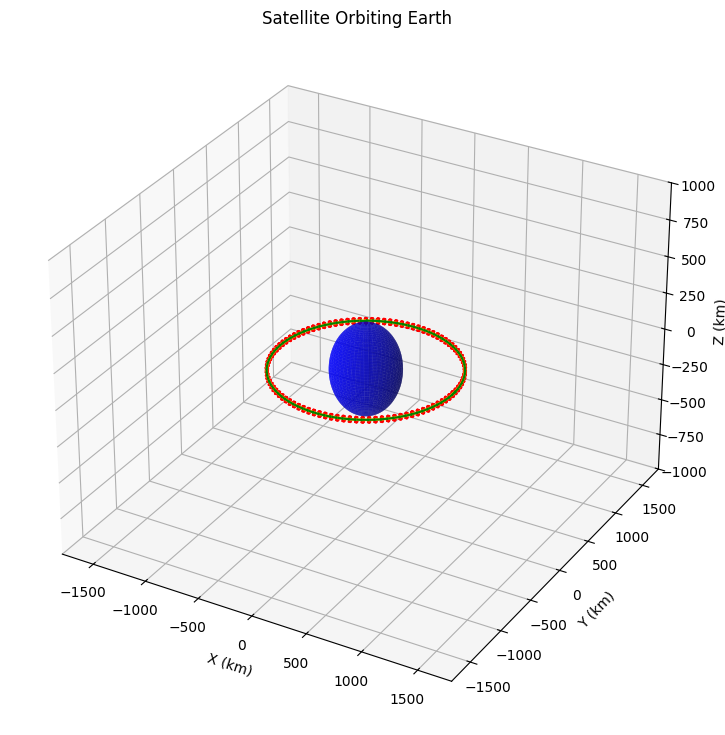

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
earth_radius = 300  # Radius of Earth in kilometers
satellite_altitude = 500  # Altitude of the satellite in kilometers
total_radius = earth_radius + satellite_altitude  # Total radius of the satellite's orbit

# Satellite size (a 10x10x30 cube)
satellite_size = (10, 10, 30)

# Number of points for the orbit
N = 100
ts = np.linspace(0, 2 * np.pi, N)  # Time from 0 to 2π for a full orbit

# Satellite's orbit (circular)
satellite_x = total_radius * np.cos(ts)
satellite_y = total_radius * np.sin(ts)
satellite_z = np.zeros(N)  # Assuming the orbit is in the x-y plane for simplicity

# Plot Setup
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot Earth as a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot Earth surface (spherical)
ax.plot_surface(x, y, z, color='blue', alpha=0.7)

# Function to plot the satellite (cube) at the given position
def plot_satellite(x_pos, y_pos, z_pos, dx_vel, dy_vel):
    # Plot a cube to represent the satellite at position (x_pos, y_pos, z_pos)
    # Cube is centered at (x_pos, y_pos, z_pos), and we use a fixed size (10x10x30)
    dx, dy, dz = satellite_size[0] / 2, satellite_size[1] / 2, satellite_size[2] / 2
    cube_vertices = np.array([[-dx, -dy, -dz], [dx, -dy, -dz], [dx, dy, -dz], [-dx, dy, -dz],
                              [-dx, -dy, dz], [dx, -dy, dz], [dx, dy, dz], [-dx, dy, dz]])

    # Shift the cube to the satellite's position
    cube_vertices += np.array([x_pos, y_pos, z_pos])

    # List of cube edges to plot
    edges = [[0, 1], [1, 2], [2, 3], [3, 0],  # bottom
             [4, 5], [5, 6], [6, 7], [7, 4],  # top
             [0, 4], [1, 5], [2, 6], [3, 7]]  # vertical edges

    # Plot edges of the cube
    for edge in edges:
        ax.plot3D(*zip(*cube_vertices[edge]), color="red")

    # Draw the satellite's facing direction using a quiver (arrow)
    # Here, the satellite is facing tangentially to its orbit, so the direction is given by (dx_vel, dy_vel)
    ax.quiver(x_pos, y_pos, z_pos, dx_vel, dy_vel, 0, length=50, color="green")

# Plot the satellite at each position along its orbit and the trajectory path
for i in range(N):
    x_pos = satellite_x[i]
    y_pos = satellite_y[i]
    z_pos = satellite_z[i]

    # The velocity components in the x and y directions (tangent to the orbit)
    dx_vel = -np.sin(ts[i])  # velocity in x
    dy_vel = np.cos(ts[i])   # velocity in y
    
    # Plot the satellite (cube) at the current position
    plot_satellite(x_pos, y_pos, z_pos, dx_vel, dy_vel)

# Plot the orbit (trajectory) line in space
ax.plot3D(satellite_x, satellite_y, satellite_z, color="orange", lw=2, label="Orbit Path")

# Set axis limits
ax.set_xlim([-total_radius-1000, total_radius+1000])
ax.set_ylim([-total_radius-1000, total_radius+1000])
ax.set_zlim([-1000, 1000])  # Adjust z-limits to allow better visibility

# Set labels and title
ax.set_title('Satellite Orbiting Earth')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')

# Display the plot
plt.show()


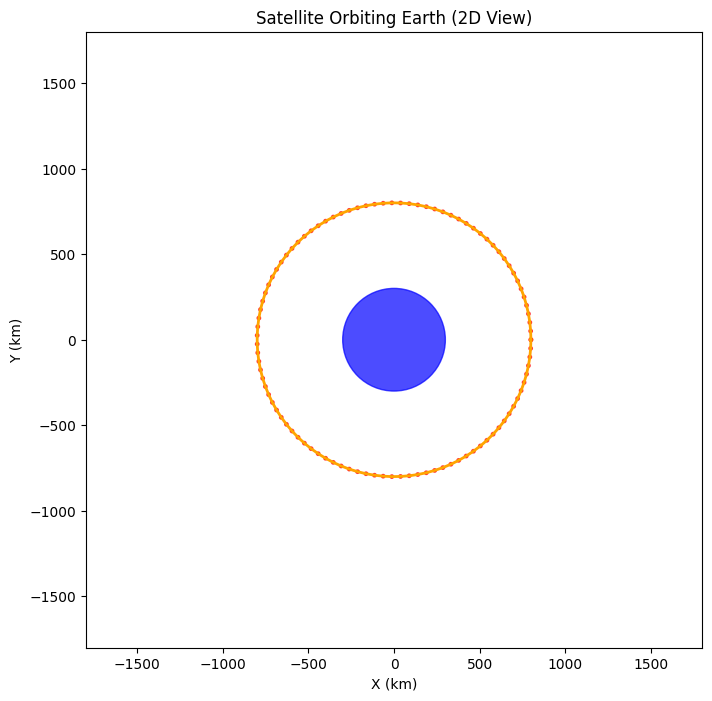

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
earth_radius = 300  # Radius of Earth in kilometers
satellite_altitude = 500  # Altitude of the satellite in kilometers
total_radius = earth_radius + satellite_altitude  # Total radius of the satellite's orbit

# Satellite size (a 10x10x30 cube), simplified to 2D as a small circle
satellite_size = 10

# Number of points for the orbit
N = 100
ts = np.linspace(0, 2 * np.pi, N)  # Time from 0 to 2π for a full orbit

# Satellite's orbit (circular)
satellite_x = total_radius * np.cos(ts)
satellite_y = total_radius * np.sin(ts)

# Plot Setup (2D plot)
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Earth as a circle
earth_circle = plt.Circle((0, 0), earth_radius, color='blue', alpha=0.7)
ax.add_artist(earth_circle)

# Function to plot the satellite (represented as a small circle) and its facing direction
def plot_satellite(x_pos, y_pos, dx_vel, dy_vel):
    # Plot the satellite as a small circle
    satellite = plt.Circle((x_pos, y_pos), satellite_size, color='red', alpha=0.7)
    ax.add_artist(satellite)

    # Draw the satellite's facing direction using an arrow
    ax.quiver(x_pos, y_pos, dx_vel, dy_vel, angles='xy', scale_units='xy', scale=1, color='green', width=0.003)

# Plot the satellite at each position along its orbit and the trajectory path
for i in range(N):
    x_pos = satellite_x[i]
    y_pos = satellite_y[i]

    # The velocity components in the x and y directions (tangent to the orbit)
    dx_vel = -np.sin(ts[i])  # velocity in x
    dy_vel = np.cos(ts[i])   # velocity in y
    
    # Plot the satellite (circle) and its facing direction
    plot_satellite(x_pos, y_pos, dx_vel, dy_vel)

# Plot the orbit (trajectory) path as a line
ax.plot(satellite_x, satellite_y, color="orange", lw=2, label="Orbit Path")

# Set axis limits
ax.set_xlim([-total_radius-1000, total_radius+1000])
ax.set_ylim([-total_radius-1000, total_radius+1000])

# Set labels and title
ax.set_title('Satellite Orbiting Earth (2D View)')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')

# Aspect ratio to make sure the Earth is a circle
ax.set_aspect('equal')

# Display the plot
plt.show()


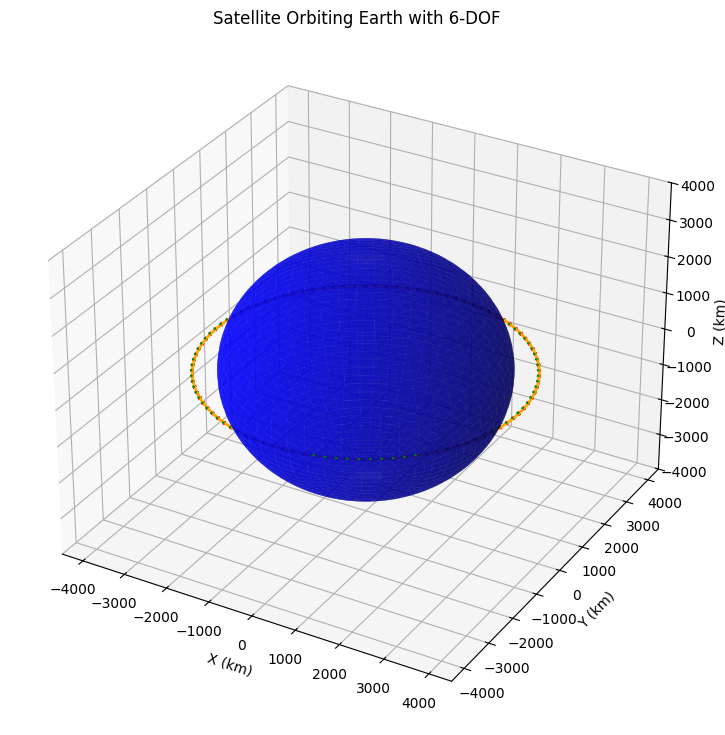

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
earth_radius = 3000  # Radius of Earth in kilometers
satellite_altitude = 500  # Altitude of the satellite in kilometers
total_radius = earth_radius + satellite_altitude  # Total radius of the satellite's orbit

# Satellite size (represented as a 10x10x30 cube)
satellite_size = (10, 10, 30)

# Number of points for the orbit
N = 100
ts = np.linspace(0, 2 * np.pi, N)  # Time from 0 to 2π for a full orbit

# Satellite's orbit (circular)
satellite_x = total_radius * np.cos(ts)
satellite_y = total_radius * np.sin(ts)
satellite_z = np.zeros(N)  # Assuming the orbit is in the x-y plane for simplicity

# Rotation angles (Roll, Pitch, Yaw) as functions of time
roll_angle = 0.05 * ts  # Roll increases over time
pitch_angle = 0.05 * ts  # Pitch increases over time
yaw_angle = 0.1 * ts  # Yaw increases over time

# Rotation matrices
def rotation_matrix(roll, pitch, yaw):
    # Roll rotation matrix (x-axis)
    R_roll = np.array([[1, 0, 0],
                       [0, np.cos(roll), -np.sin(roll)],
                       [0, np.sin(roll), np.cos(roll)]])
    
    # Pitch rotation matrix (y-axis)
    R_pitch = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                        [0, 1, 0],
                        [-np.sin(pitch), 0, np.cos(pitch)]])
    
    # Yaw rotation matrix (z-axis)
    R_yaw = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                      [np.sin(yaw), np.cos(yaw), 0],
                      [0, 0, 1]])
    
    # Combined rotation matrix
    R = np.dot(R_yaw, np.dot(R_pitch, R_roll))
    return R

# Plot Setup
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot Earth as a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot Earth surface (spherical)
ax.plot_surface(x, y, z, color='blue', alpha=0.7)

# Function to plot the satellite (cube) at the given position in 3D with rotation
def plot_satellite(x_pos, y_pos, z_pos, R):
    # Plot a cube to represent the satellite at position (x_pos, y_pos, z_pos)
    dx, dy, dz = satellite_size[0] / 2, satellite_size[1] / 2, satellite_size[2] / 2
    cube_vertices = np.array([[-dx, -dy, -dz], [dx, -dy, -dz], [dx, dy, -dz], [-dx, dy, -dz],
                              [-dx, -dy, dz], [dx, -dy, dz], [dx, dy, dz], [-dx, dy, dz]])

    # Shift the cube to the satellite's position
    cube_vertices += np.array([x_pos, y_pos, z_pos])

    # Rotate the cube vertices by the rotation matrix R
    rotated_vertices = np.dot(cube_vertices - np.array([x_pos, y_pos, z_pos]), R.T) + np.array([x_pos, y_pos, z_pos])

    # List of cube edges to plot
    edges = [[0, 1], [1, 2], [2, 3], [3, 0],  # bottom
             [4, 5], [5, 6], [6, 7], [7, 4],  # top
             [0, 4], [1, 5], [2, 6], [3, 7]]  # vertical edges

    # Plot edges of the rotated cube
    for edge in edges:
        ax.plot3D(*zip(*rotated_vertices[edge]), color="red")

    # Draw the satellite's facing direction using the rotated velocity vector
    velocity_vector = np.array([satellite_y[0] - satellite_y[1], satellite_x[1] - satellite_x[0], 0])
    velocity_vector = velocity_vector / np.linalg.norm(velocity_vector)  # Normalize velocity vector
    ax.quiver(x_pos, y_pos, z_pos, velocity_vector[0], velocity_vector[1], velocity_vector[2], length=50, color="green", arrow_length_ratio=0.1)

# Plot the satellite at each position along its orbit
for i in range(N):
    x_pos = satellite_x[i]
    y_pos = satellite_y[i]
    z_pos = satellite_z[i]

    # Get rotation matrix for the current time step
    R = rotation_matrix(roll_angle[i], pitch_angle[i], yaw_angle[i])

    # Plot the satellite (cube) at the current position and its direction
    plot_satellite(x_pos, y_pos, z_pos, R)

# Plot the orbit (trajectory) path as a line
ax.plot3D(satellite_x, satellite_y, satellite_z, color="orange", lw=2, label="Orbit Path")

# Set axis limits
ax.set_xlim([-total_radius-1000, total_radius+1000])
ax.set_ylim([-total_radius-1000, total_radius+1000])
ax.set_zlim([-4000, 4000])  # Adjust z-limits to allow better visibility

# Set labels and title
ax.set_title('Satellite Orbiting Earth with 6-DOF')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')

plt.show()


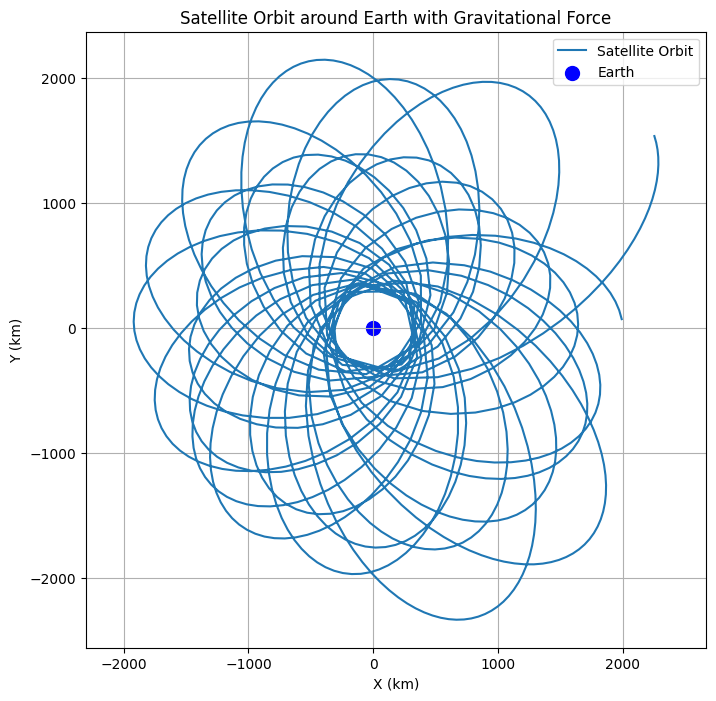

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in N·m²/kg²
M = 5.972e24     # Mass of the Earth in kg
m = 500           # Mass of the satellite in kg (arbitrary value)
r_earth = 6371e3  # Radius of the Earth in meters
altitude = 500e3  # Altitude of the satellite in meters
r_total = r_earth + altitude  # Total distance from the Earth's center

# Initial conditions
theta = 0  # Starting angle (radians)
x = r_total * np.cos(theta)  # Initial x-position
y = r_total * np.sin(theta)  # Initial y-position
vx = 0  # Initial x-velocity (m/s)
vy = 7.12e3  # Initial y-velocity (m/s) (approx circular orbit velocity)

# Time parameters
dt = 10  # Time step in seconds
N = 1000  # Number of time steps
positions = []

# Simulation loop (using Euler's method for simplicity)
for _ in range(N):
    # Calculate the distance from the Earth's center
    r = np.sqrt(x**2 + y**2)
    
    # Calculate the gravitational force
    F = G * M * m / r**2
    
    # Calculate acceleration (a = F/m)
    ax = -F * x / (m * r)  # x-component of acceleration
    ay = -F * y / (m * r)  # y-component of acceleration
    
    # Update velocities and positions using Euler method
    vx += ax * dt
    vy += ay * dt
    x += vx * dt
    y += vy * dt
    
    # Store the position
    positions.append((x, y))

# Convert the list of positions to a numpy array for plotting
positions = np.array(positions)

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0] / 1e3, positions[:, 1] / 1e3, label="Satellite Orbit")
plt.scatter(0, 0, color="blue", label="Earth", s=100)  # Earth at the center
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("Satellite Orbit around Earth with Gravitational Force")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


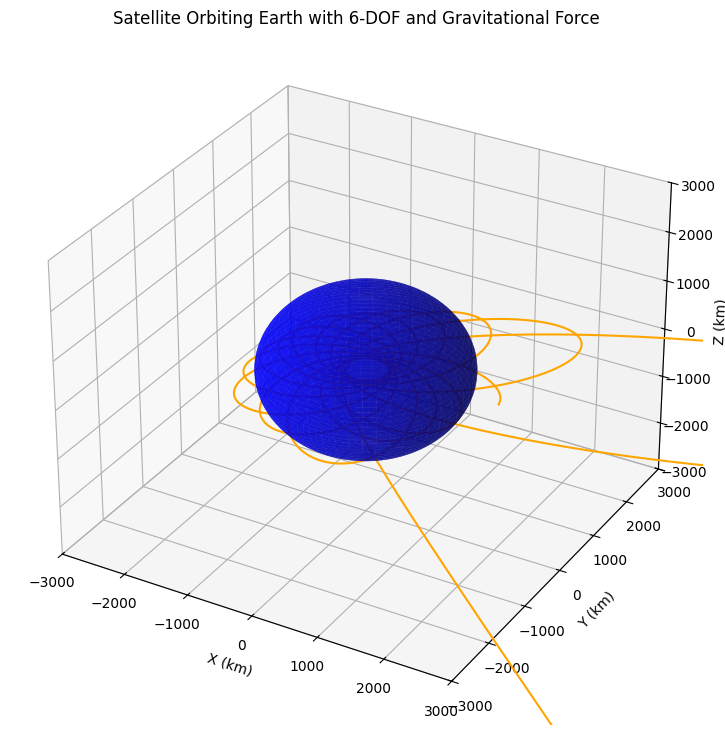

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # Gravitational constant in N·m²/kg²
M = 5.972e24     # Mass of Earth in kg
m = 500           # Mass of the satellite in kg
r_earth = 1500e3  # Radius of the Earth in meters
altitude = 500e3  # Altitude of the satellite in meters
r_total = r_earth + altitude  # Total distance from Earth's center

# Initial conditions
theta = 0  # Starting angle (radians)
x = r_total * np.cos(theta)  # Initial x-position
y = r_total * np.sin(theta)  # Initial y-position
z = 0  # Assuming the orbit is in the x-y plane for simplicity
vx = 0  # Initial x-velocity (m/s)
vy = 7.12e3  # Initial y-velocity (m/s) (approx circular orbit velocity)
vz = 0  # Initial z-velocity (m/s)

# Time parameters
dt = 10  # Time step in seconds
N = 1000  # Number of time steps
positions = []
velocities = []

# Function to compute gravitational force
def gravitational_force(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    F = G * M * m / r**2  # Gravitational force
    Fx = -F * x / r  # x-component of force
    Fy = -F * y / r  # y-component of force
    Fz = -F * z / r  # z-component of force
    return Fx, Fy, Fz

# Function to compute rotation matrix from Euler angles (Roll, Pitch, Yaw)
def rotation_matrix(roll, pitch, yaw):
    # Roll, Pitch, Yaw are in radians
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll), np.cos(roll)]])
    
    R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]])
    
    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw), np.cos(yaw), 0],
                    [0, 0, 1]])

    return np.dot(R_z, np.dot(R_y, R_x))

# Simulation loop (Euler method)
for _ in range(N):
    # Compute gravitational force at the current position
    Fx, Fy, Fz = gravitational_force(x, y, z)
    
    # Compute acceleration (F = ma, a = F/m)
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # Update velocities and positions using Euler method
    vx += ax * dt
    vy += ay * dt
    vz += az * dt
    x += vx * dt
    y += vy * dt
    z += vz * dt
    
    # Store the position and velocity
    positions.append((x, y, z))
    velocities.append((vx, vy, vz))

# Convert the list of positions to a numpy array for plotting
positions = np.array(positions)

# Set up the plot
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot Earth as a sphere (reduced size for better visibility)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
earth_x = (r_earth / 1000) * np.outer(np.cos(u), np.sin(v))  # Rescale Earth
earth_y = (r_earth / 1000) * np.outer(np.sin(u), np.sin(v))  # Rescale Earth
earth_z = (r_earth / 1000) * np.outer(np.ones(np.size(u)), np.cos(v))  # Rescale Earth

# Plot Earth surface (spherical)
ax.plot_surface(earth_x, earth_y, earth_z, color='blue', alpha=0.7)

# Plot the satellite's path (orbital trajectory)
ax.plot3D(positions[:, 0] / 1e3, positions[:, 1] / 1e3, positions[:, 2] / 1e3, color='orange', label="Orbit Path")

# Function to plot the satellite orientation (using velocity vector)
def plot_satellite_orientation(x_pos, y_pos, z_pos, vx, vy, vz):
    # Compute the orientation of the satellite using the velocity vector
    direction = np.array([vx, vy, vz])
    norm = np.linalg.norm(direction)
    if norm > 0:
        direction = direction / norm
    # Plot the direction as a red arrow (velocity direction)
    ax.quiver(x_pos / 1e3, y_pos / 1e3, z_pos / 1e3, direction[0], direction[1], direction[2], color='red', length=0.5, normalize=True)

# Plot the satellite orientation at each time step
for i in range(0, N, int(N/10)):  # Reduce the number of arrows for clarity
    x_pos = positions[i, 0]
    y_pos = positions[i, 1]
    z_pos = positions[i, 2]
    vx_pos = velocities[i][0]
    vy_pos = velocities[i][1]
    vz_pos = velocities[i][2]
    
    # Plot the orientation of the satellite
    plot_satellite_orientation(x_pos, y_pos, z_pos, vx_pos, vy_pos, vz_pos)

# Set axis limits
ax.set_xlim([-r_total/1e3-1000, r_total/1e3+1000])  # Adjust for visibility
ax.set_ylim([-r_total/1e3-1000, r_total/1e3+1000])  # Adjust for visibility
ax.set_zlim([-3000, 3000])  # Adjust z-limits to allow better visibility

# Set labels and title
ax.set_title('Satellite Orbiting Earth with 6-DOF and Gravitational Force')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')

plt.show()
